In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
import json
import warnings
warnings.filterwarnings('ignore')
import base64
import io
from scipy.misc import imread
import codecs
from IPython.display import HTML
%matplotlib inline

In [5]:
df = pd.read_csv('input/title.basics.tsv',sep='\t')

In [7]:
print('Dataset contains {} entries'.format(len(df)))

Dataset contains 5304237 entries


In [8]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [9]:
df.dtypes

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult            int64
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

In [10]:
#df['startYear'].astype(str).astype(int)
df['startYear'] = pd.to_numeric(df['startYear'], errors='coerce')

Select movies from 2000 on

In [13]:
df_2000 = df[(df['startYear'] > 2000) & (df['startYear'] < 2019) &  (df['titleType']=='movie')]

In [14]:
df_2000.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34822,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,\N,118,"Comedy,Fantasy,Romance"
65549,tt0066853,movie,Na Boca da Noite,Na Boca da Noite,0,2016.0,\N,68,Drama
67703,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,\N,122,"Comedy,Drama"
86847,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,\N,100,"Comedy,Horror,Sci-Fi"
92821,tt0094859,movie,Chief Zabu,Chief Zabu,0,2016.0,\N,74,Comedy


In [15]:
count_movies = df_2000.groupby(['startYear']).size().reset_index(name='counts')

In [16]:
count_movies.rename(columns={'startYear':'Year', 'counts':'Counts' }, inplace=True)

In [17]:
count_movies['Year'] = count_movies['Year'].astype('int')

In [18]:
count_movies

,Year,Counts
0,2001,5181
1,2002,5375
2,2003,5453
3,2004,6052
4,2005,6872
5,2006,7344
6,2007,8021
7,2008,9439
8,2009,11075
9,2010,11915


In [154]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10,5)})

In [21]:
sns.set_context("poster", font_scale=0.85)

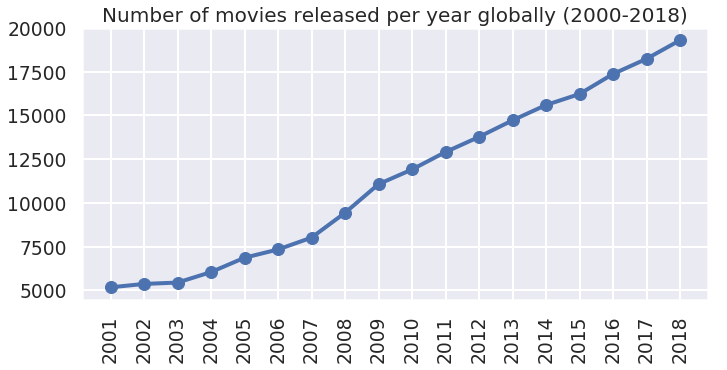

<Figure size 720x360 with 0 Axes>

In [21]:
plt.plot( 'Year', 'Counts', data=count_movies, marker='o',linewidth=4)
plt.xticks(count_movies['Year'],count_movies['Year'],rotation=90)
plt.title('Number of movies released per year globally (2000-2018)',size=20)
plt.show()
plt.savefig('Movies_per_year.png')

# Linear regression for movies forecasting

Predicting how many movies will be released in 2019 and 2020

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
X = np.array(count_movies['Year']).reshape(-1, 1)
y = np.array(count_movies['Counts']).reshape(-1, 1)

In [24]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
lm.intercept_ , lm.coef_

(array([-1792871.44582043]), array([[897.86171311]]))

In [26]:
y.shape

(18, 1)

In [27]:
X_test = np.array([2019,2020]).reshape(-1, 1)

In [34]:
pred = lm.predict(X_test)

In [65]:
print('Prediction for year {}: {}'.format(X_test[0][0],int(pred[0][0])))
print('Prediction for year {}: {}'.format(X_test[1][0],int(pred[1][0])))

Prediction for year 2019: 19911
Prediction for year 2020: 20809


In [45]:
count_movies.loc[19] = [2019,int(pred[0][0])]
count_movies.loc[20] = [2020,int(pred[1][0])]

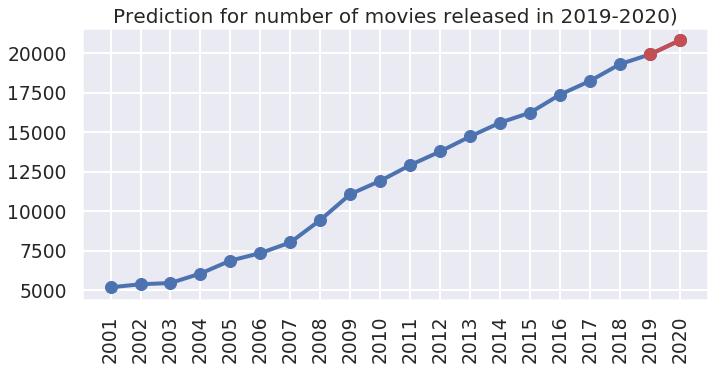

In [60]:
plt.plot( 'Year', 'Counts', data=count_movies, marker='o',linewidth=4)
plt.plot( 'Year', 'Counts', data=count_movies[count_movies.Year > 2018],c = "r", marker='o',linewidth=4)
plt.xticks(count_movies['Year'],count_movies['Year'],rotation=90)
plt.title('Prediction for number of movies released in 2019-2020)',size=20)
plt.show()

# Movies by genres

In [2]:
pd.options.display.float_format = '{:.0f}'.format

In [3]:
movies=pd.read_csv('input/tmdb_5000_movies.csv')
#mov=pd.read_csv('input/tmdb_5000_credits.csv')

In [4]:
# changing the genres column from json to string
movies['genres']=movies['genres'].apply(json.loads)
for index,i in zip(movies.index,movies['genres']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))# the key 'name' contains the name of the genre
    movies.loc[index,'genres']=str(list1)
    
# changing the keywords column from json to string
movies['keywords']=movies['keywords'].apply(json.loads)
for index,i in zip(movies.index,movies['keywords']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'keywords']=str(list1)
    
## changing the production_companies column from json to string
movies['production_companies']=movies['production_companies'].apply(json.loads)
for index,i in zip(movies.index,movies['production_companies']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_companies']=str(list1)
    
# changing the production_countries column from json to string    
movies['production_countries']=movies['production_countries'].apply(json.loads)
for index,i in zip(movies.index,movies['production_countries']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_countries']=str(list1)

In [69]:
    
# changing the cast column from json to string
mov['cast']=mov['cast'].apply(json.loads)
for index,i in zip(mov.index,mov['cast']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    mov.loc[index,'cast']=str(list1)

# changing the crew column from json to string    
mov['crew']=mov['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
mov['crew']=mov['crew'].apply(director)
mov.rename(columns={'crew':'director'},inplace=True)

NameError: name 'mov' is not defined

In [49]:
movies=movies.merge(mov,left_on='id',right_on='movie_id',how='left')

In [5]:
movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [6]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7,11800
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['United States of America'],2007-05-19,961000000,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,7,4500
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107,"['Columbia Pictures', 'Danjaq', 'B24']","['United Kingdom', 'United States of America']",2015-10-26,880674609,148,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6,4466
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",['United States of America'],2012-07-16,1084939099,165,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,8,9106
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",44,['Walt Disney Pictures'],['United States of America'],2012-03-07,284139100,132,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6,2124


In [8]:
# to tranform list in string format back to list
import ast

In [11]:
genre_labels = []
for genres in movies['genres']:
    genres = ast.literal_eval(genres)
    #print(genres)
    for genre in genres:
            genre_labels.append(genre)
            
genre_labels = list(set(genre_labels))
#genre_labels.remove('')

In [172]:
genre_labels

['Foreign',
 'Documentary',
 'Romance',
 'Thriller',
 'Fantasy',
 'Horror',
 'Science Fiction',
 'History',
 'TV Movie',
 'Family',
 'War',
 'Comedy',
 'Western',
 'Animation',
 'Mystery',
 'Action',
 'Music',
 'Crime',
 'Adventure',
 'Drama']

In [13]:
print('There are {} movies on the database'.format(len(movies)))
print('Only {} has budget information'.format(len(movies[movies['budget']>100])))

There are 4803 movies on the database
Only 3742 has budget information


In [14]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [15]:
movies_bud = movies[movies['budget']>100][['budget','genres','original_title','release_date']]

In [16]:
for genre in genre_labels:
    movies_bud[genre] = movies_bud['genres'].apply(lambda x:1 if genre in x else 0)

In [17]:
movies_bud['year'] = pd.to_datetime(movies_bud['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x!= np.nan else np.nan)

In [18]:
movies_bud.head()

,budget,genres,original_title,release_date,Foreign,Documentary,Romance,Thriller,Fantasy,Horror,...,Comedy,Western,Animation,Mystery,Action,Music,Crime,Adventure,Drama,year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",Avatar,2009-12-10,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",Pirates of the Caribbean: At World's End,2007-05-19,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,2007
2,245000000,"['Action', 'Adventure', 'Crime']",Spectre,2015-10-26,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",The Dark Knight Rises,2012-07-16,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",John Carter,2012-03-07,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,2012


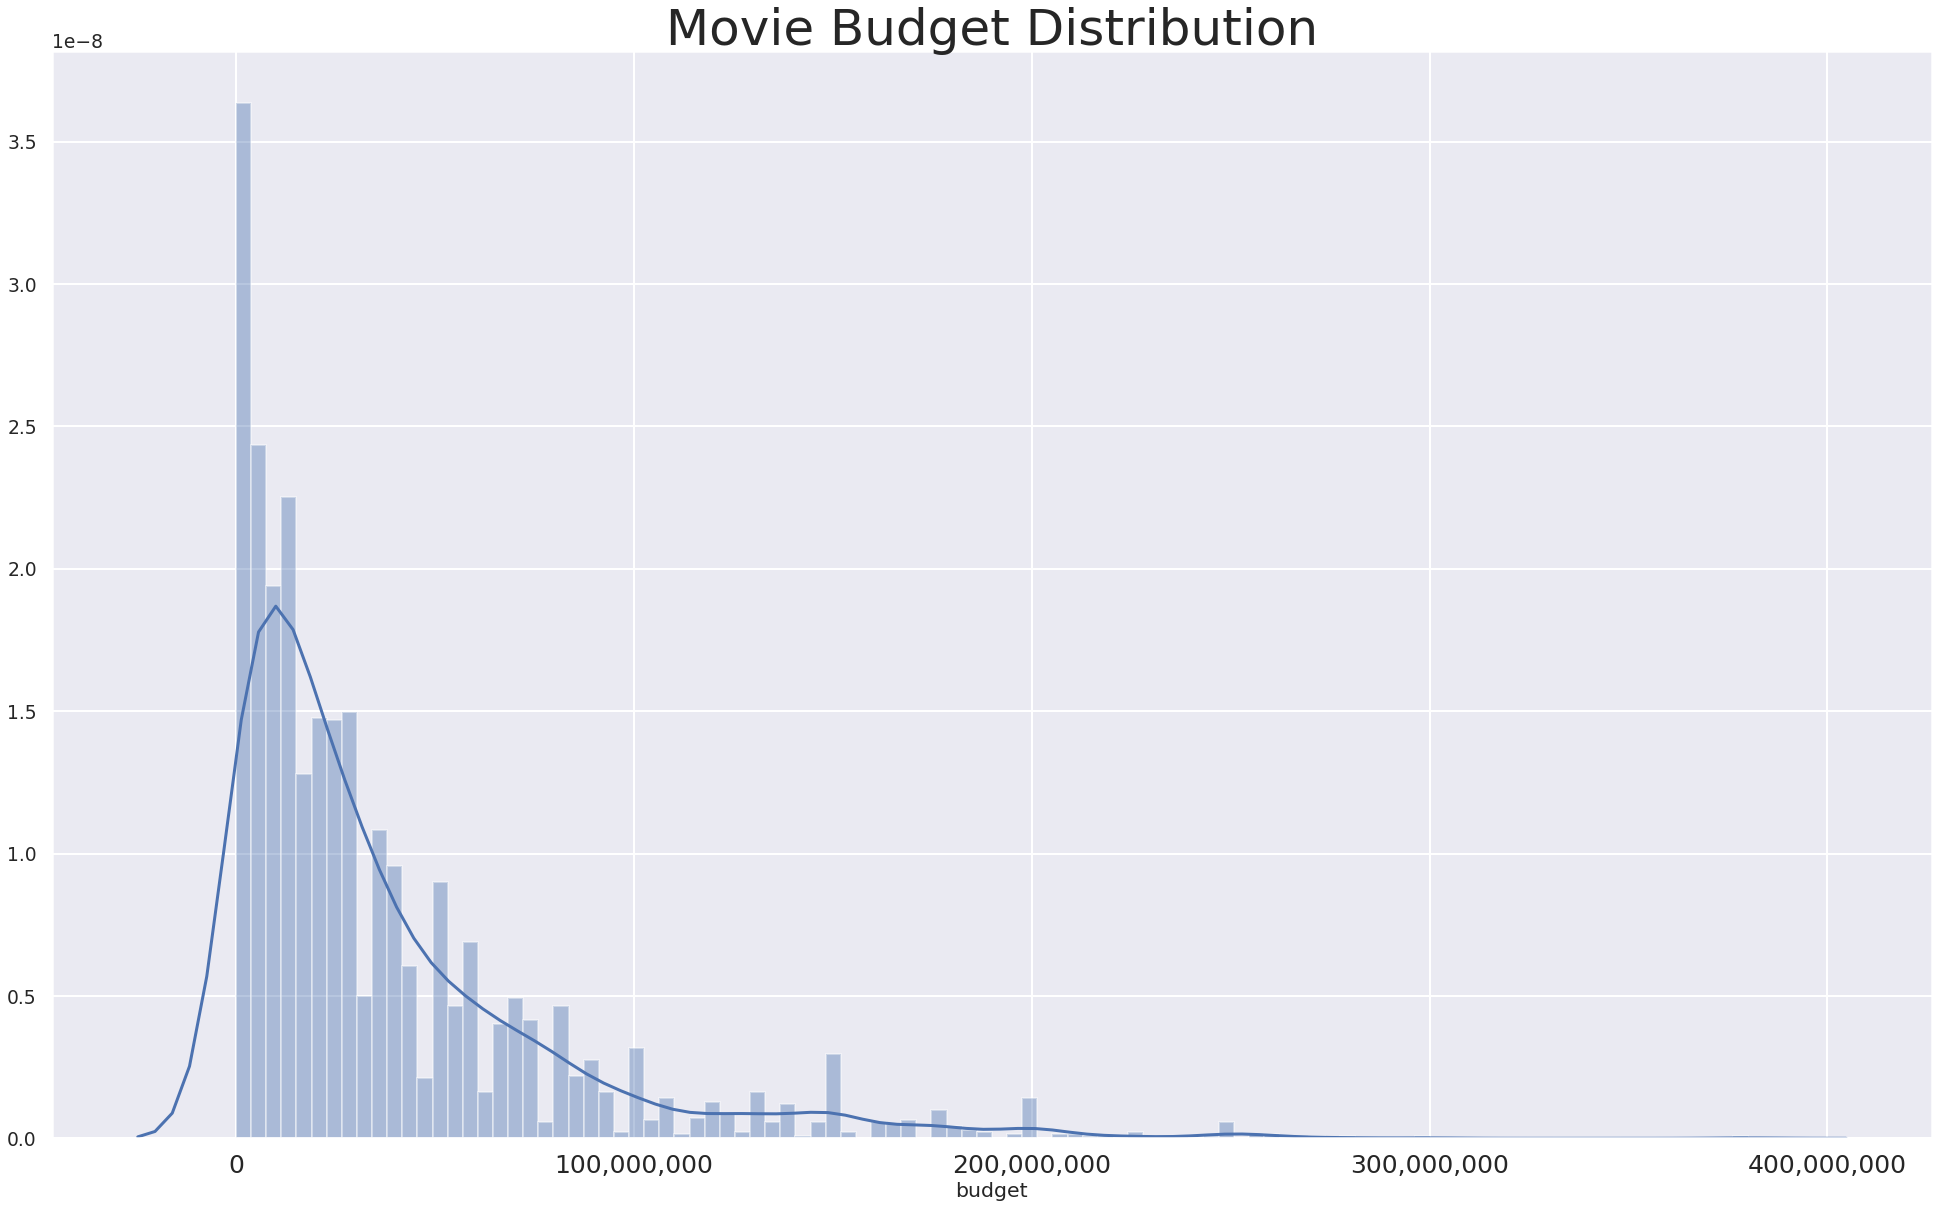

In [24]:
f, (ax1) = plt.subplots(1, 1, figsize=(30, 20), sharex=True)# Generate some sequential data
sns.distplot(movies_bud['budget'].dropna(), bins=100,ax=ax1)
#ax1.set_xticklabels(mean_per_genre[0],rotation=90,fontsize=25)
ax1.set_xticklabels(['{:,}'.format(int(x)) for x in ax1.get_xticks().tolist()],fontsize=25)
#ax1.set_yticklabels(mean_per_genre['mean_budget'],fontsize=25)
plt.title('Movie Budget Distribution',size=50)
plt.show()

In [25]:
def get_stats(gr):
    return {'min':gr.min(),'max':gr.max(),'count': gr.count(),'mean':gr.mean()}

In [26]:
year = movies_bud['budget'].groupby(movies_bud['year']).apply(get_stats).unstack()
year.reset_index(level=0, inplace=True)

In [27]:
year['year']=year['year'].astype('int')

In [28]:
year[year['year']>1986][:5]

,year,count,max,mean,min
58,1987,23,55000000,16343478,1000000
59,1988,24,63000000,13475000,1300000
60,1989,29,70000000,19319310,160000
61,1990,25,70000000,29569000,225000
62,1991,26,100000000,27807692,500000


In [185]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(30,30)})

<Figure size 2160x2160 with 0 Axes>

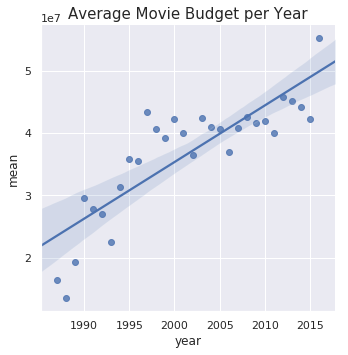

In [186]:
#sns.set_context("poster", font_scale=0.85)
plt.figure(figsize=(30,30))
sns.lmplot(x='year', y='mean', data=year[year['year']>1986])
plt.title('Average Movie Budget per Year',size=15)
plt.show()

In [62]:
year[year['year'] == 2016]

,year,count,max,mean,min
87,2016,86,250000000,55269070,750000


In [110]:
mean_per_genre = pd.DataFrame(genre_labels,columns=['Genre'])

In [111]:
mean = []
count = []

In [112]:
for genre in genre_labels:
    mean.append(movies_bud[movies_bud[genre]==1]['budget'].mean())
    count.append(movies_bud[movies_bud[genre]==1]['budget'].count())


In [113]:
mean_per_genre['Mean Budget'] = mean

In [114]:
mean_per_genre['Count'] = count

In [116]:
mean_per_genre.sort_values(['Mean Budget'], ascending=False, inplace=True)

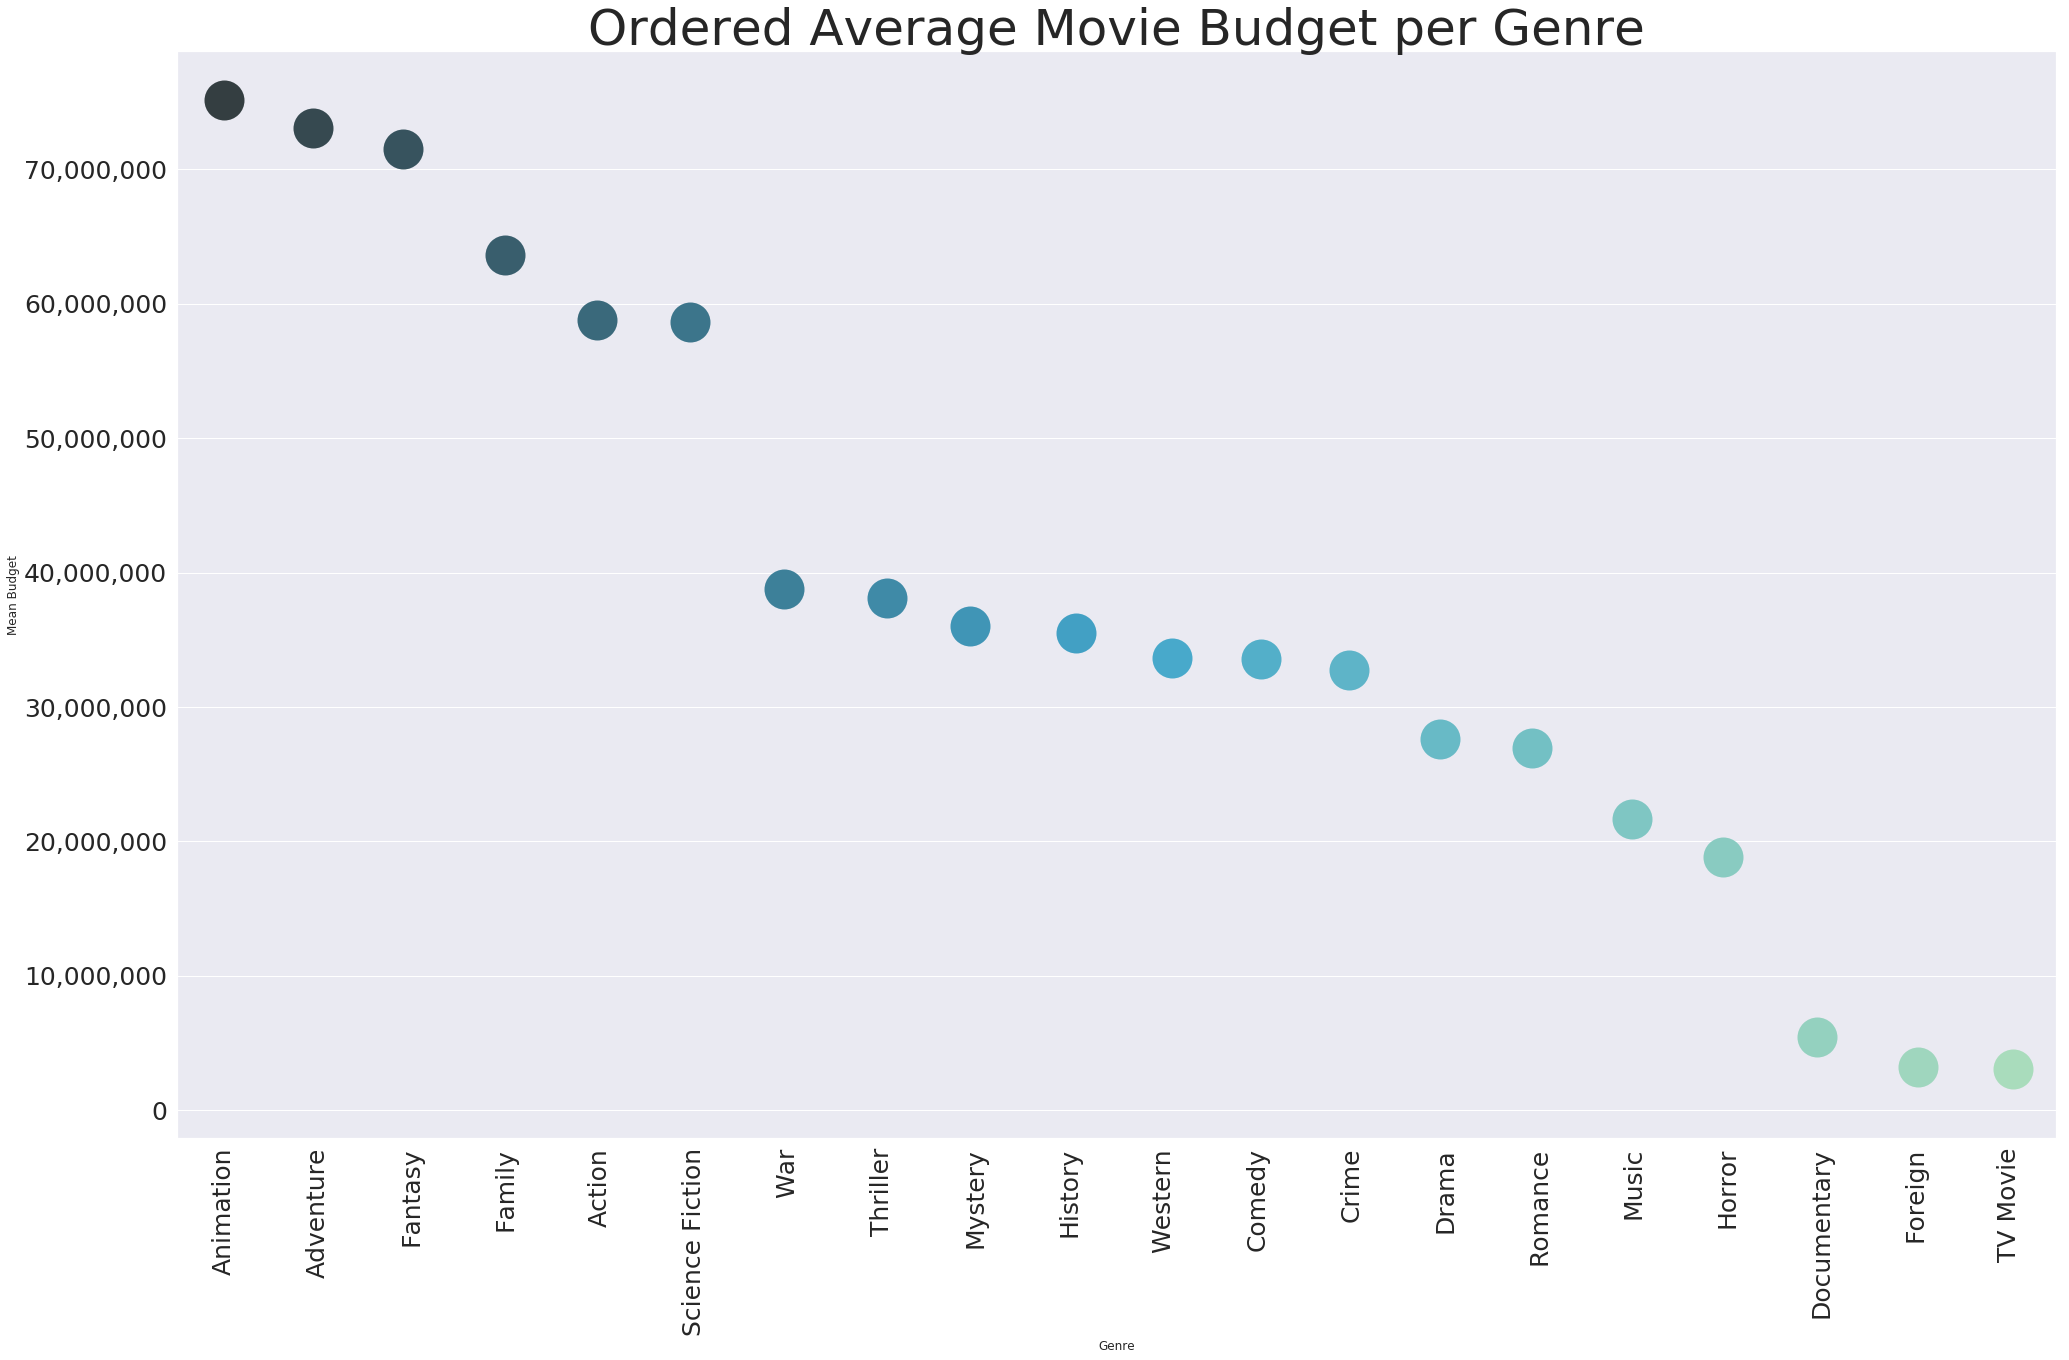

In [155]:
f, (ax1) = plt.subplots(1, 1, figsize=(30, 20), sharex=True)# Generate some sequential data
#sns.barplot(mean_per_genre[0], mean_per_genre['mean'], palette="GnBu_d", ax=ax1)
sns.stripplot(mean_per_genre['Genre'], mean_per_genre['Mean Budget'], palette="GnBu_d", ax=ax1, size=40)
ax1.set_xticklabels(mean_per_genre['Genre'],rotation=90,fontsize=25)
ax1.set_yticklabels(['{:,}'.format(int(x)) for x in ax1.get_yticks().tolist()],fontsize=25)
#ax1.set_yticklabels(mean_per_genre['mean_budget'],fontsize=25)
plt.title('Ordered Average Movie Budget per Genre',size=50)
plt.show()

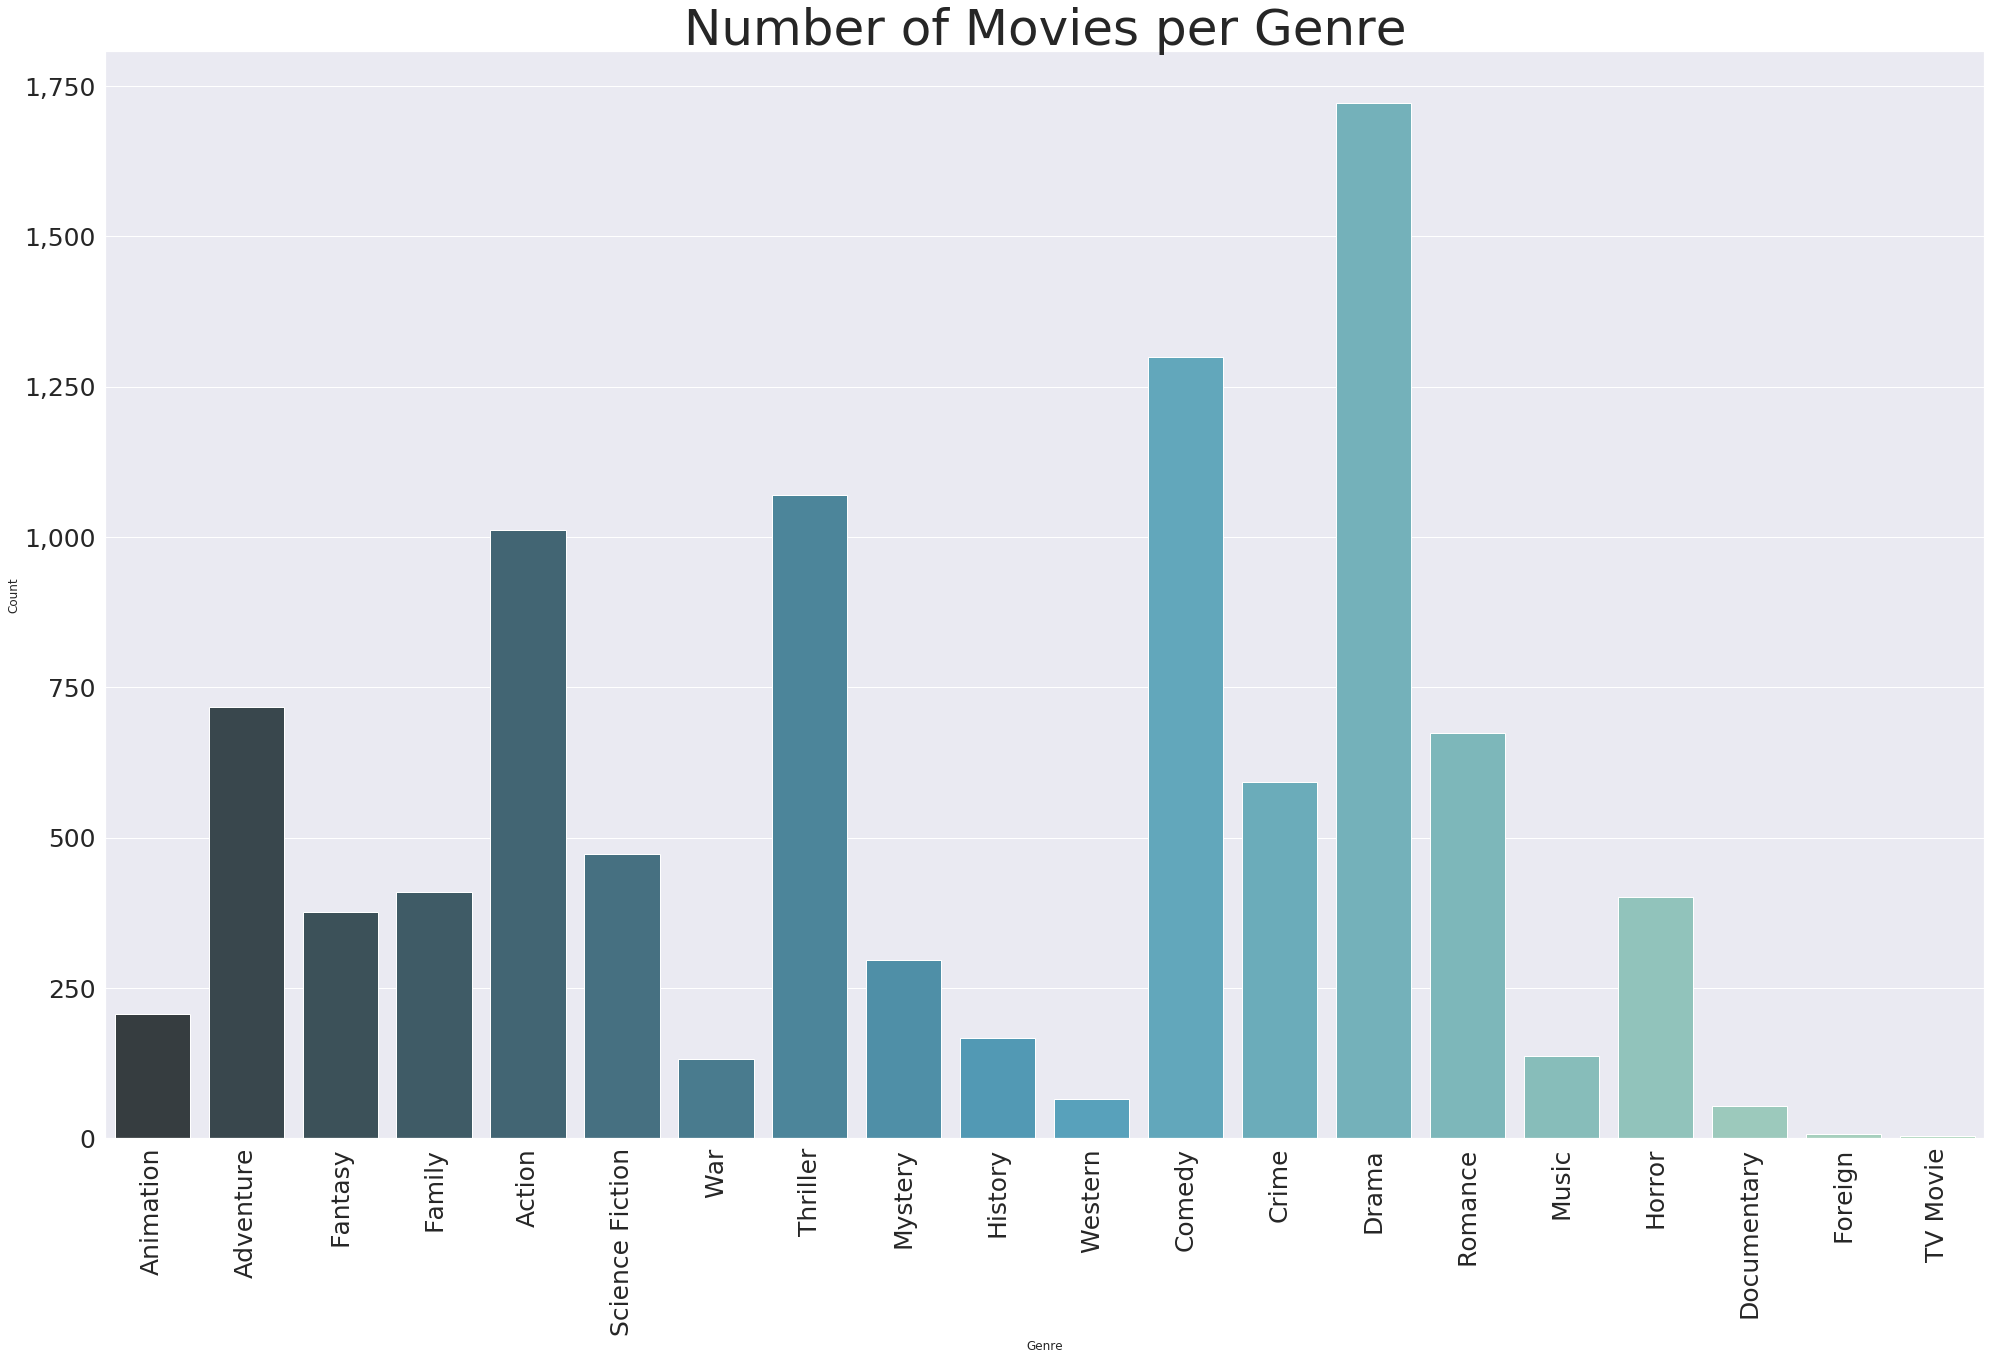

In [156]:
f, (ax1) = plt.subplots(1, 1, figsize=(30, 20), sharex=True)# Generate some sequential data
sns.barplot(mean_per_genre['Genre'], mean_per_genre['Count'], palette="GnBu_d", ax=ax1)
ax1.set_xticklabels(mean_per_genre['Genre'],rotation=90,fontsize=25)
ax1.set_yticklabels(['{:,}'.format(int(x)) for x in ax1.get_yticks().tolist()],fontsize=25)
plt.title('Number of Movies per Genre',size=50)
#ax1.set_yticklabels(mean_per_genre['mean_budget'],fontsize=25)
plt.show()

In [119]:
high_budget = ['Animation','Adventure','Fantasy','Family','Action','ScienceFiction']
med_budget = ['War', 'Thriller','Mystery','History','Western','Comedy','Crime']
low_budget = ['Drama','Romance','Music','Horror','Documentary','Foreign','TVMovie']

In [100]:
mean_per_genre.columns

Index(['Genre', 'mean', 'count'], dtype='object')

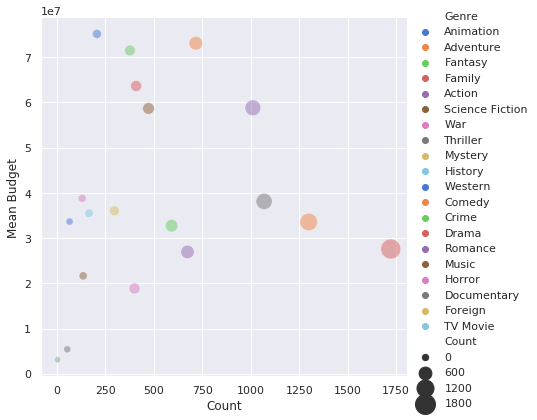

In [191]:

#f, (ax1) = plt.subplots(1, 1, figsize=(2, 3), sharex=True)# Generate some sequential data
#sns.set_palette(sns.color_palette("hls", 20))
sns.relplot(x='Count', y='Mean Budget', size='Count', hue='Genre',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mean_per_genre)
#plt.title('Number of movies per average budget per genre',size=20, pad=4)
plt.show()

In [158]:
movies_bud.head()

,budget,genres,original_title,release_date,Foreign,Documentary,Romance,Thriller,Fantasy,Horror,...,Comedy,Western,Animation,Mystery,Action,Music,Crime,Adventure,Drama,year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",Avatar,2009-12-10,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",Pirates of the Caribbean: At World's End,2007-05-19,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,2007
2,245000000,"['Action', 'Adventure', 'Crime']",Spectre,2015-10-26,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",The Dark Knight Rises,2012-07-16,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",John Carter,2012-03-07,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,2012


In [ ]:
movies_bud[movies_bud['Horror']==1]

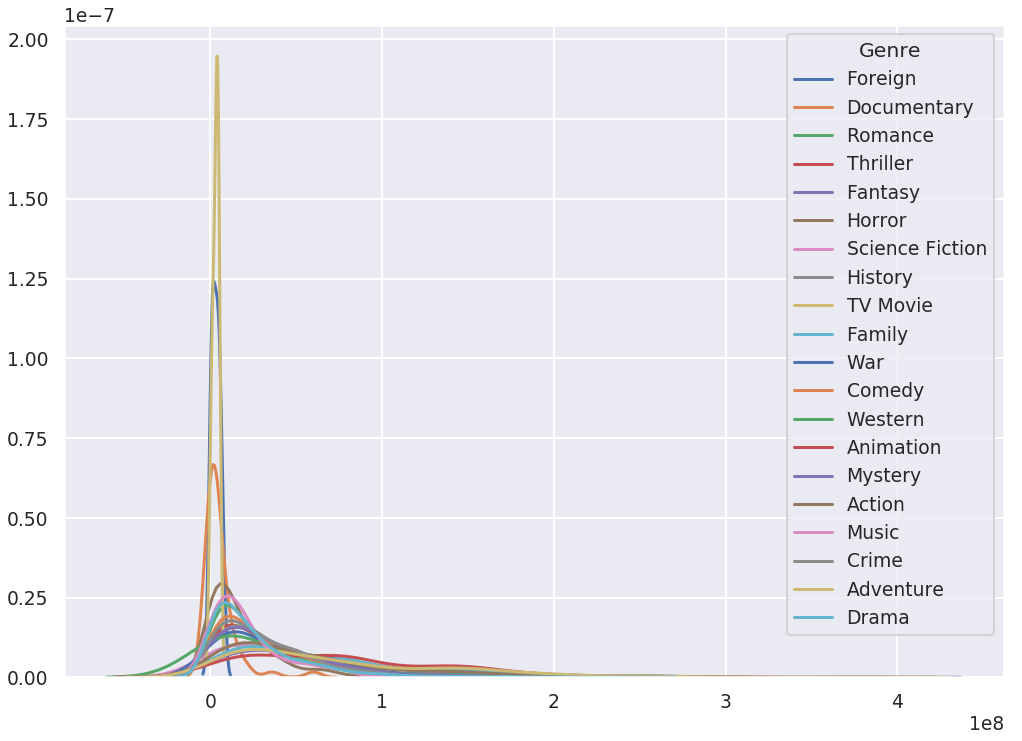

In [180]:
sns.set_context("poster", font_scale=0.85)
f, (ax1) = plt.subplots(1, 1, figsize=(15, 12), sharex=True)# Generate some sequential data
for gen in genre_labels:
    sns.kdeplot(movies_bud[movies_bud[gen]==1]['budget'],ax=ax1)
plt.legend(title='Genre',  labels=genre_labels)

In [ ]:
import matplotlib.pyplot as plt

df1 = df.select_dtypes([np.int, np.float])

n=len(df1.columns)
fig,ax = plt.subplots(n,1, figsize=(6,n*2), sharex=True)
for i in range(n):
    plt.sca(ax[i])
    col = df1.columns[i]
    sns.countplot(df1[col].values)
    ylabel(col);